In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [21]:
path = '../LLM/result'
file_list = os.listdir(path)
fig_path = './fig/'
colors = plt.get_cmap('tab20').colors 

In [14]:
tmp = pd.DataFrame()
df_eval = pd.DataFrame()
def sc_calc_acc_condition_with_temp_with_sc(llm_model, few_shot_n, test_n, q_src_yn, ver, p_ver, sc_num, temp, excel_ver):
    # ./result/sc_l_result_4_15_Y_30_sys_prompt8_0.01_ver1_0.csv
    acc_list = []
    file_list = os.listdir(path)
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}_{ver}_{p_ver}_{sc_num}_{temp}_{excel_ver}')]
    opt_file = [x for x in opt_file if x.endswith(f'.csv')]

    df = pd.DataFrame()


    # pattern = re.compile(r'.*_[0-9]\.csv$')
    # opt_file = [x for x in opt_file if pattern.match(x)]
    
    
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            tmp = tmp.dropna()

            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp = tmp[tmp['o_result'].isin(['1', '0', '2'])]

            
            gold_df = tmp[['id', 'gold']].drop_duplicates()
            chk_cnt = tmp.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'question']]
            chk_cnt = chk_cnt.rename(columns = {'question': 'cnt'})
            chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]
            chk_cnt = chk_cnt.sort_values(by = ['id', 'cnt'], ascending=[True, False]).groupby(['id']).head(1)
            df_eval = pd.merge(gold_df, chk_cnt, on = ['id'])

            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            acc_list.append(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)
        return acc_list


In [15]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
acc_list = sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt9', 5,  0.01, 'ver3')

sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_61.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_35.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_29.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_58.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_77.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_49.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_84.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_36.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_25.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_53.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_55.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_40.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_85.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_5.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_57.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_70.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_37.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_83.csv
sc_l_result_4_30_Y_100_sys_pr

In [16]:
print(acc_list)

[85.0, 82.6086956521739, 70.0, 82.35294117647058, 70.0, 82.35294117647058, 80.0, 81.25, 77.27272727272727, 70.0, 76.47058823529412, 85.0, 80.0, 69.23076923076923, 63.33333333333333, 76.92307692307693, 80.95238095238095, 70.58823529411765, 85.71428571428571, 68.75, 92.85714285714286, 75.0, 81.81818181818183, 82.6086956521739, 69.56521739130434, 62.5, 81.81818181818183, 82.6086956521739, 65.0, 78.26086956521739, 83.33333333333334, 85.0, 82.6086956521739, 75.0, 90.0, 77.27272727272727, 92.3076923076923, 70.58823529411765, 62.5, 79.16666666666666, 86.95652173913044, 70.0, 73.68421052631578, 85.71428571428571, 72.0, 66.66666666666666, 80.0, 63.1578947368421, 80.95238095238095, 68.18181818181817, 63.63636363636363, 82.35294117647058, 66.66666666666666, 82.35294117647058, 84.61538461538461, 76.19047619047619, 76.92307692307693, 76.19047619047619, 93.75, 69.56521739130434, 80.0, 78.94736842105263, 70.58823529411765, 80.95238095238095, 92.85714285714286, 78.94736842105263, 92.3076923076923, 66.

In [17]:
# sc_calc_acc_condition_with_temp_with_sc('l', 4, 15, 'Y', 30, 'sys_prompt8', 5,  0.01, 'ver1')
# # process3 = Process(target=task, args=('l', 4, 15, 'Y', 30, 'sys_prompt8', 3, 0.01, 'ver1'))
acc_list = sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt8', 5,  0.01, 'ver2')
# 그래프 그려서 넣어두기... 분포....

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_16.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_84.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_0.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_10.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_64.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_35.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_72.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_2.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_12.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_74.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_62.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_54.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_32.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_45.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_18.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_86.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_15.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_33.csv
sc_l_result_4_30_Y_100_sys_pro

In [18]:
np.mean(acc_list)

83.67379071062875

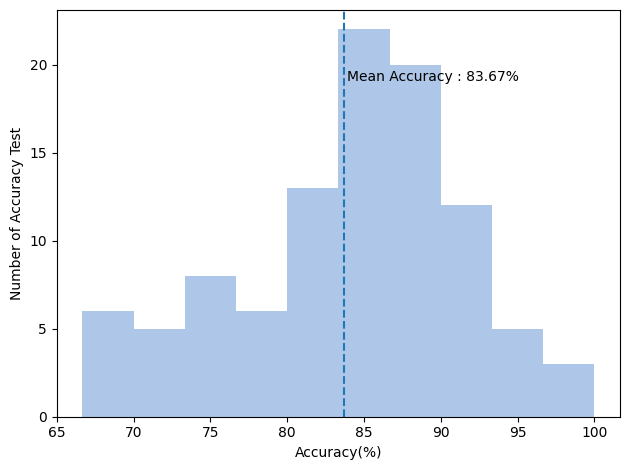

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(acc_list
    ,  color = colors[1]
    # ,  edgecolor = 'black'
      ) # hist type

# ax.set_title("Histogram of Acc Test", # add title
#              fontsize = 12.5,
#              weight = 'bold',
#              pad = 10,
#              loc = 'center')
ax.set_xlabel("Accuracy(%)", # add x-axis label
              )
ax.set_ylabel("Number of Accuracy Test", # add y-axis label
              )

ax.axvline(np.mean(acc_list), # add vertical line
           color = colors[0],
           linestyle = '--',
           linewidth = 1.5)
fig.text(0.55, 0.82, fontsize = 10,  s=f'Mean Accuracy : {round(np.mean(acc_list), 2)}%') #
plt.tight_layout()    
plt.savefig(f"{fig_path}Data_Fig5.png", dpi=300, bbox_inches='tight')
plt.show();


In [ ]:
# def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
#     opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
#     opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

#     if len(opt_file)>0 : 
#         df = pd.DataFrame()

#         for f in opt_file:
#             tmp = pd.read_csv(f'./result/{f}', index_col =0)
#             df = pd.concat([df, tmp], axis =0)
        
#         df['gold'] = df['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['o_result'] = df['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
#         acc = (df['equal_yn'].sum()/df.shape[0])*100
#         print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [ ]:
def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

    if len(opt_file)>0 : 
        df = pd.DataFrame()

        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df = pd.concat([df, tmp], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [ ]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt1')


calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt1')

calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt1')


In [ ]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt2')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt2')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt2')


In [ ]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt3')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt3')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt3')


In [ ]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt4')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt4')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt4')


In [ ]:
def sc_calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        print(opt_file)
        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            # print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [ ]:
sc_calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4') # temperature 0.2
sc_calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')

sc_calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')

In [ ]:
sc_calc_acc_condition('l' , 1, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'Y', 'sys_prompt4')

# sc_l_result_1_10_Y_0_sys_prompt4.csv
# (f'./result/sc_{llm_model}_result_{few_shot_n}_{self.test_n}_{q_src_yn}_{self.version}_{self.p_ver}.csv')

sc_calc_acc_condition('l' , 1, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'N', 'sys_prompt4')


In [ ]:

sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt5')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt5')


In [ ]:

sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')


In [ ]:
sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt7')


In [ ]:

sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt7')


In [ ]:

sc_calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt7')


In [ ]:
def sc_calc_acc_condition_with_temp(llm_model, few_shot_n, test_n, q_src_yn, p_ver, temp):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [ ]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0)

In [ ]:
llm_model, few_shot_n,test_n, q_src_yn, p_ver, temp = 'l',2, 10, 'Y','sys_prompt4', 0
opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
df = pd.DataFrame()
if len(opt_file)>0 : 
    for f in opt_file:
        print(f)
        tmp = pd.read_csv(f'./result/{f}', index_col =0)
        tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
        tmp['equal_yn'] = np.where(tmp['gold']==tmp['o_result'], 1, 0)
        acc = (tmp['equal_yn'].sum()/tmp.shape[0])*100  
        df = pd.concat([df, tmp], axis =0)

df.to_csv('youcandoit.csv')

In [ ]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0.5)